# ML Group Project

## Data Load and Exploratory Analysis

In [1]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
from sklearn.exceptions import ConvergenceWarning
import statistics as stat
import numpy as np
import pandas as pd
import Helper_Function as hf #File with custom-built functions
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import classification_report, roc_curve
from sklearn.decomposition import PCA
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

file_path_1 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Labels.csv'
file_path_2 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Train.csv'
file_path_3 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/test.csv'

#Dataiku nulls out amount_tsv, need to keep original set
file_path_4 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Train_prepared.csv'
file_path_5 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Test_prepared.csv'

labels = hf.read_data(file_path_1)
raw_df = hf.read_data(file_path_2)

#Final Test Data
test_df = hf.read_data(file_path_3)

#External Data
pop_df = pd.read_excel('External_features.xls', sheet_name = 0)
weather_df = pd.read_excel('External_features.xls', sheet_name = 1)

raw_df.describe(include = 'all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400.000000,59400.000000,59400,59400,59400.000000,59400,59400.000000,5.940000e+04,59400,59400.000000,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1898,NaN,2146,NaN,NaN,37400,NaN,...,7,8,6,5,5,10,7,3,7,6
top,NaN,NaN,3/15/11,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
raw_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
pop_df.head()

,Name,Abbr.,Status,Capital,Area_KM2,Population2002,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016
0,Tanzania,TZA,Rep,Dodoma,885803,34443603,44928923,0.304420,50.721123,50144200
1,Arusha,ARU,Reg,Arusha,37576,1288088,1694310,0.315368,45.090217,1890700
2,Dar es Salaam,DAR,Reg,Dar es Salaam,1393,2487288,4364541,0.754739,3133.195262,5465400
3,Dodoma,DOD,Reg,Dodoma,41311,1692025,2083588,0.231417,50.436639,2264500
4,Geita,GEI,Reg,Geita,20054,1337718,1739530,0.300371,86.742296,1932200


In [4]:
weather_df.head()

,Month_num,Month,Temp_Min,Temp_max,rainy_days,total_rain_mm
0,1,January,18.6,29.4,10,133.7
1,2,February,18.6,29.4,9,144.5
2,3,March,18.3,29.0,7,113.9
3,4,April,17.9,28.7,5,57.8
4,5,May,16.5,28.0,1,5.3


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
r

In [6]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [7]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
Name                    27 non-null object
Abbr.                   27 non-null object
Status                  27 non-null object
Capital                 27 non-null object
Area_KM2                27 non-null int64
Population2002          27 non-null int64
Population2012          27 non-null int64
Increase 2002 - 2012    27 non-null float64
Pop_Density2012         27 non-null float64
Population2016          27 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 2.2+ KB


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
Month_num        12 non-null int64
Month            12 non-null object
Temp_Min         12 non-null float64
Temp_max         12 non-null float64
rainy_days       12 non-null int64
total_rain_mm    12 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 656.0+ bytes


In [9]:
raw_df = raw_df.drop('date_recorded', axis = 1)
clean_df = hf.read_data(file_path_4)
cols = ['id', 'Year', 'Month', 'Day', 'Day_of_week']
dates = clean_df[cols]
dates_df = pd.merge(dates, raw_df, how = 'inner', on ='id') 
dates_df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,id,Year,Month,Day,Day_of_week,amount_tsh,funder,gps_height,installer,longitude,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,2011,3,14,1,6000.0,Roman,1390,Roman,34.938093,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,2013,3,6,3,0.0,Grumeti,1399,GRUMETI,34.698766,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,2013,2,25,1,25.0,Lottery Club,686,World vision,37.460664,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,2013,1,28,1,0.0,Unicef,263,UNICEF,38.486161,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,2011,7,13,3,0.0,Action In A,0,Artisan,31.130847,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
initial_df = pd.merge(labels, dates_df, how = 'inner', on ='id') 
initial_df.head()

,id,status_group,Year,Month,Day,Day_of_week,amount_tsh,funder,gps_height,installer,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,2011,3,14,1,6000.0,Roman,1390,Roman,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,2013,3,6,3,0.0,Grumeti,1399,GRUMETI,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,2013,2,25,1,25.0,Lottery Club,686,World vision,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,2013,1,28,1,0.0,Unicef,263,UNICEF,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,2011,7,13,3,0.0,Action In A,0,Artisan,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [11]:
combined_df = pd.merge(initial_df, pop_df, how = 'left', left_on = 'region', right_on = 'Name')
combined_df.head()

,id,status_group,Year,Month,Day,Day_of_week,amount_tsh,funder,gps_height,installer,...,Name,Abbr.,Status,Capital,Area_KM2,Population2002,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016
0,69572,functional,2011,3,14,1,6000.0,Roman,1390,Roman,...,Iringa,IRI,Reg,Iringa,35503,840404,941238,0.119983,26.511506,984900
1,8776,functional,2013,3,6,3,0.0,Grumeti,1399,GRUMETI,...,Mara,MAR,Reg,Musoma,21760,1363397,1743830,0.279033,80.139246,1924200
2,34310,functional,2013,2,25,1,25.0,Lottery Club,686,World vision,...,Manyara,MAY,Reg,Babati,44522,1037605,1425131,0.373481,32.009591,1618000
3,67743,non functional,2013,1,28,1,0.0,Unicef,263,UNICEF,...,Mtwara,MTW,Reg,Mtwara,16710,1124481,1270854,0.130169,76.053501,1334600
4,19728,functional,2011,7,13,3,0.0,Action In A,0,Artisan,...,Kagera,KAG,Reg,Bukoba,25265,1791451,2458023,0.372085,97.289650,2789600


In [12]:
combined_df = pd.merge(combined_df, weather_df, how = 'left', left_on = 'Month', 
                       right_on = 'Month_num')
combined_df.head()

,id,status_group,Year,Month_x,Day,Day_of_week,amount_tsh,funder,gps_height,installer,...,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016,Month_num,Month_y,Temp_Min,Temp_max,rainy_days,total_rain_mm
0,69572,functional,2011,3,14,1,6000.0,Roman,1390,Roman,...,941238,0.119983,26.511506,984900,3,March,18.3,29.0,7,113.9
1,8776,functional,2013,3,6,3,0.0,Grumeti,1399,GRUMETI,...,1743830,0.279033,80.139246,1924200,3,March,18.3,29.0,7,113.9
2,34310,functional,2013,2,25,1,25.0,Lottery Club,686,World vision,...,1425131,0.373481,32.009591,1618000,2,February,18.6,29.4,9,144.5
3,67743,non functional,2013,1,28,1,0.0,Unicef,263,UNICEF,...,1270854,0.130169,76.053501,1334600,1,January,18.6,29.4,10,133.7
4,19728,functional,2011,7,13,3,0.0,Action In A,0,Artisan,...,2458023,0.372085,97.289650,2789600,7,July,13.6,26.5,0,0.0


In [13]:
hf.null_check(combined_df)

No nulls present.


In [14]:
#Group variables by variable type
nums = hf.numerical_features(combined_df)
cat = hf.categorical_features(combined_df)
bools = hf.boolean_features(combined_df)

print('='*20)
print('Numericals: {:.3f}'.format(len(nums)))
print('Categoricals: {:.3f}'.format(len(cat)))
print('Booleans: {:.3f}'.format(len(bools)))
print('='*20)

Numericals: 25.000
Categoricals: 35.000
Booleans: 2.000


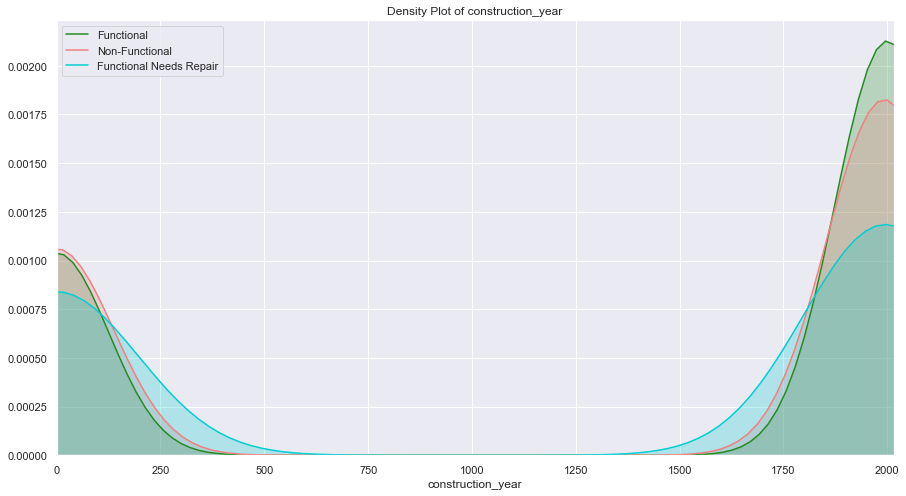

In [15]:
hf.density_plot(combined_df, 'construction_year', lower_bound = 0, upper_bound = 2015)

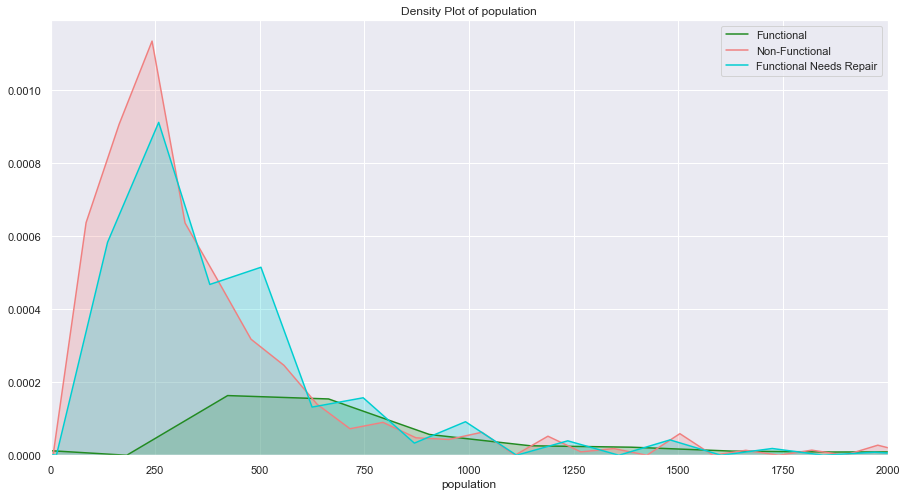

In [16]:
hf.density_plot(combined_df, 'population', lower_bound = 0, upper_bound = 2000)

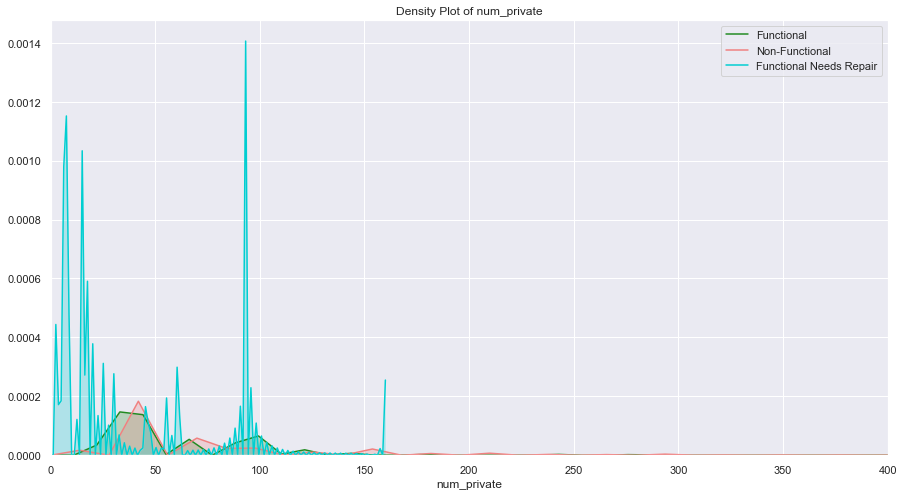

In [17]:
hf.density_plot(combined_df, 'num_private', lower_bound = 0, upper_bound = 400)

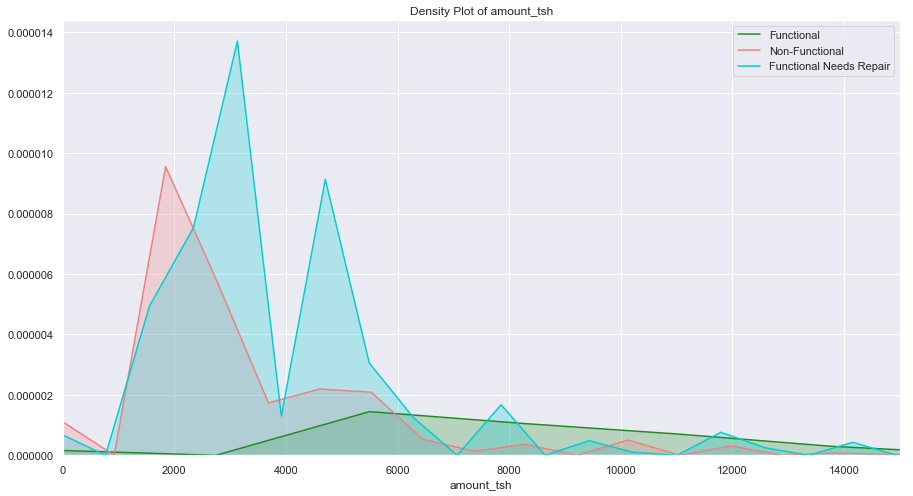

In [18]:
hf.density_plot(combined_df, 'amount_tsh', lower_bound = 0, upper_bound = 15000)

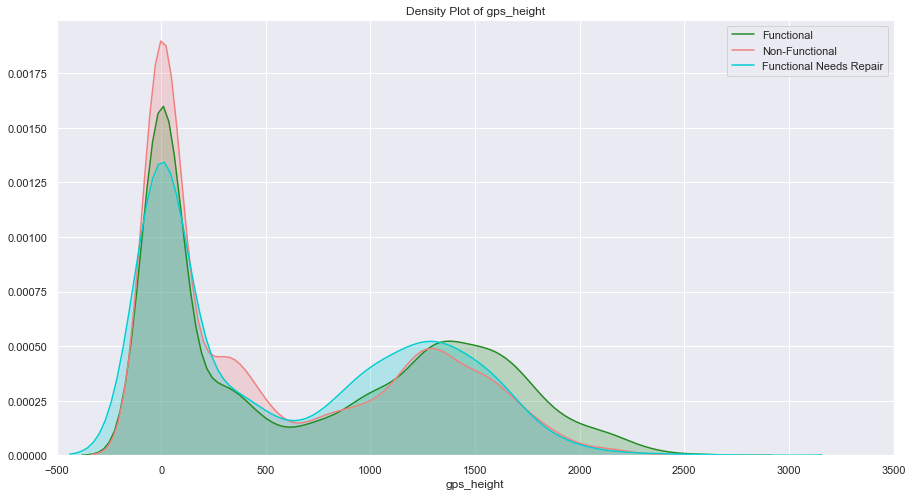

In [ ]:
hf.density_plot(combined_df, 'gps_height', lower_bound = -500, upper_bound = 3500)

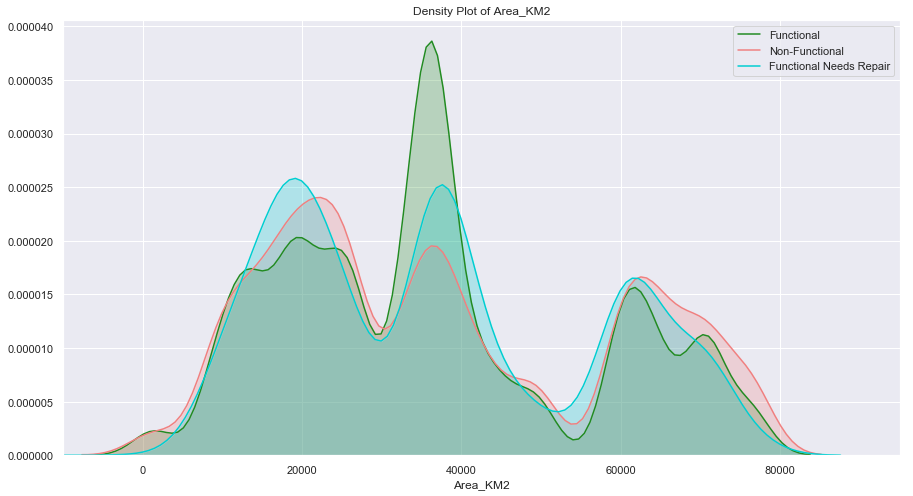

In [ ]:
hf.density_plot(combined_df, 'Area_KM2', lower_bound = -10000, upper_bound = 95000)

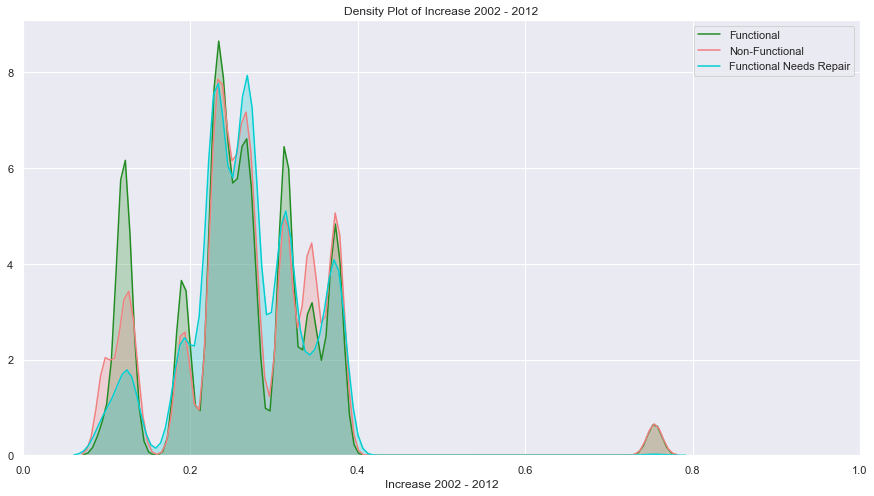

In [ ]:
hf.density_plot(combined_df, 'Increase 2002 - 2012', lower_bound = 0, upper_bound = 1)

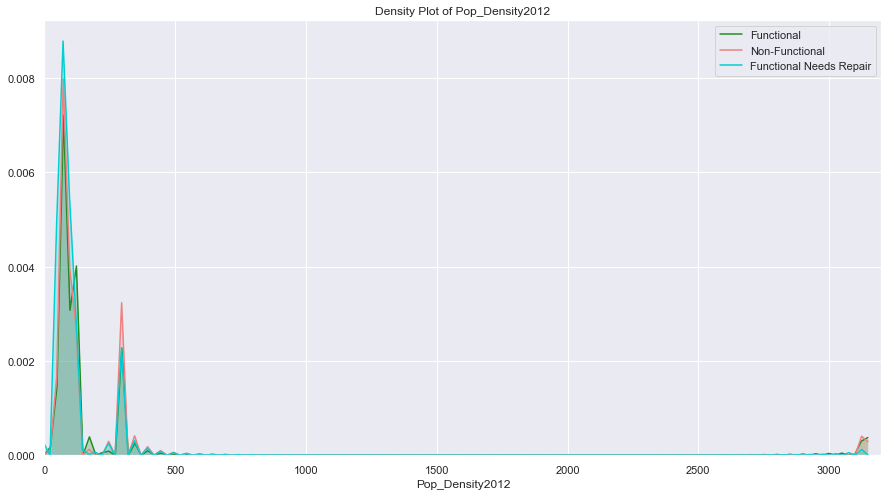

In [ ]:
hf.density_plot(combined_df, 'Pop_Density2012', lower_bound = 0, upper_bound = 3200)

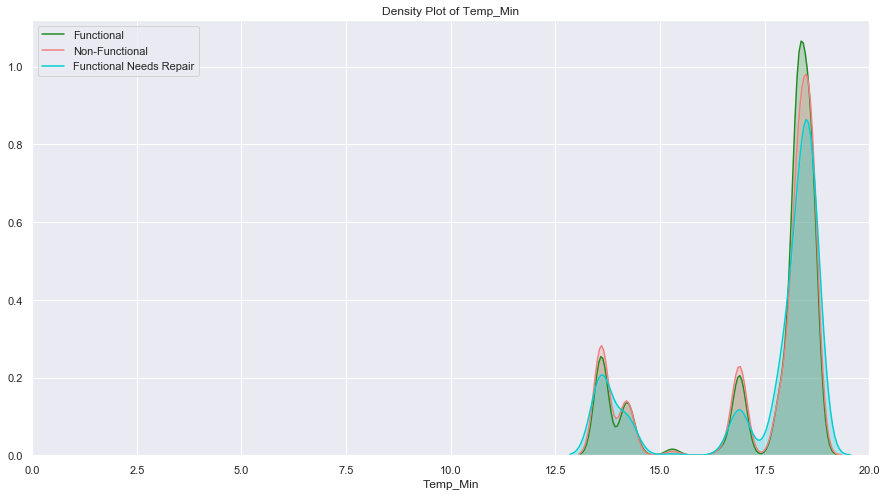

In [ ]:
hf.density_plot(combined_df, 'Temp_Min', lower_bound = 0, upper_bound = 20)

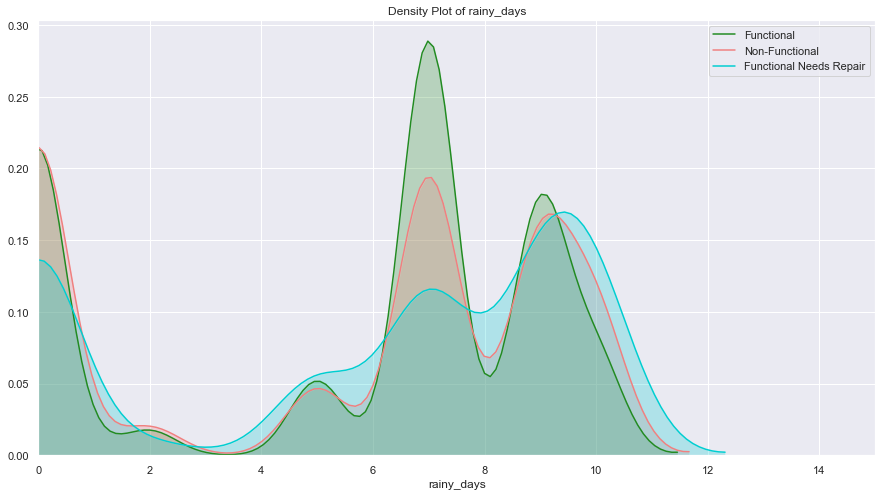

In [ ]:
hf.density_plot(combined_df, 'rainy_days', lower_bound = 0, upper_bound = 15)

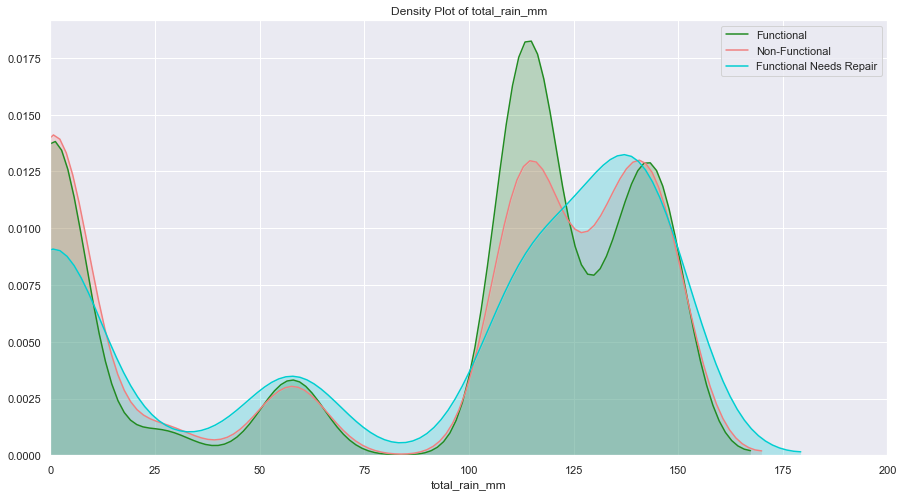

In [ ]:
hf.density_plot(combined_df, 'total_rain_mm', lower_bound = 0, upper_bound = 200)

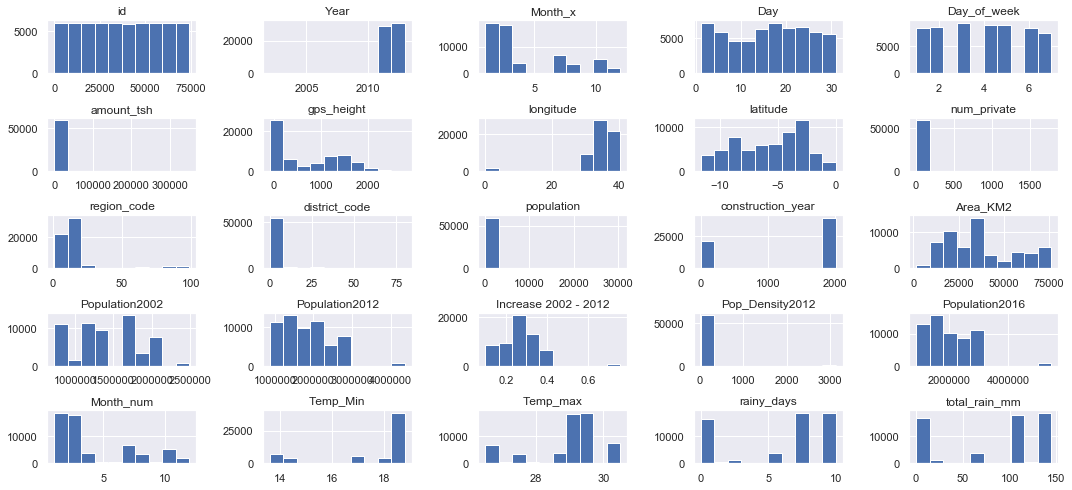

In [ ]:
hf.draw_histograms(combined_df, nums, n_rows = 6, n_cols = 5)
scaled_numerics = nums.drop('id')

In [ ]:
reduced_cat, large_drop, small_drop = hf.drop_categorical(combined_df, cat, upper_bound = 30, 
                                                          lower_bound = 2)

The following categories have too many unique values: ['installer', 'subvillage', 'lga', 'scheme_name', 'funder', 'wpt_name', 'ward']
The following categories have too few unique values: ['recorded_by', 'Status']


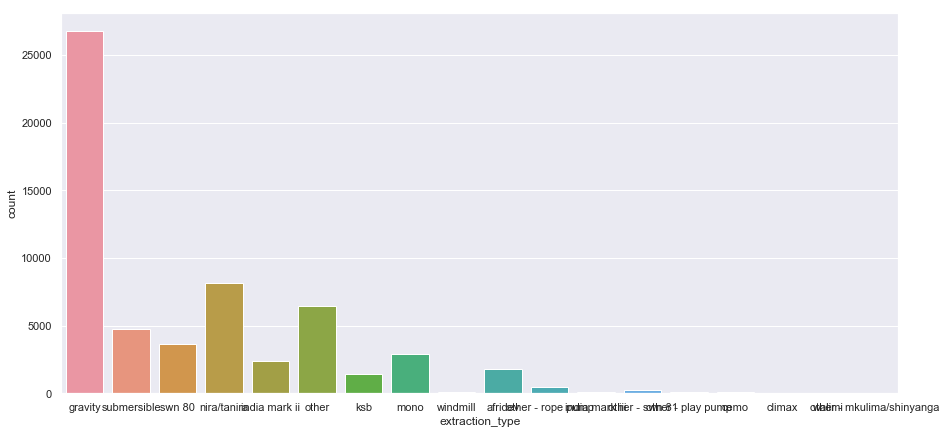

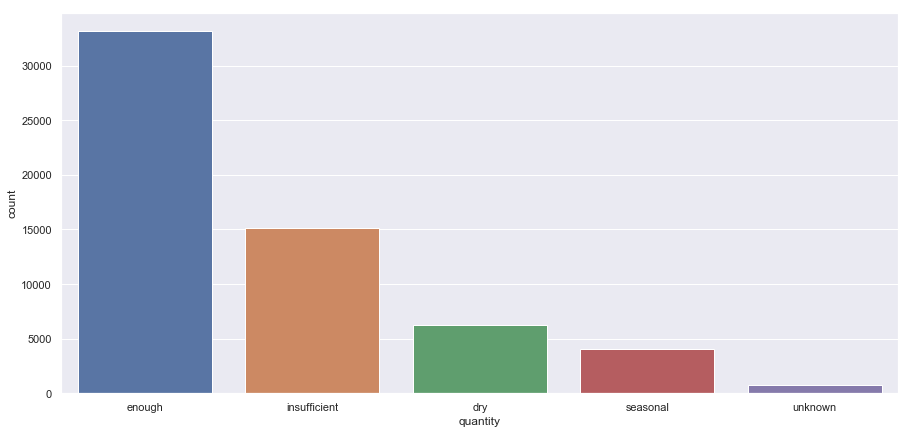

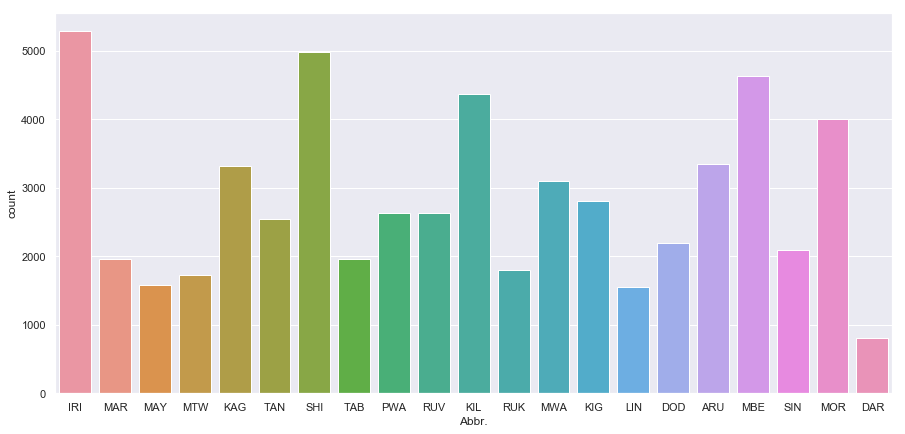

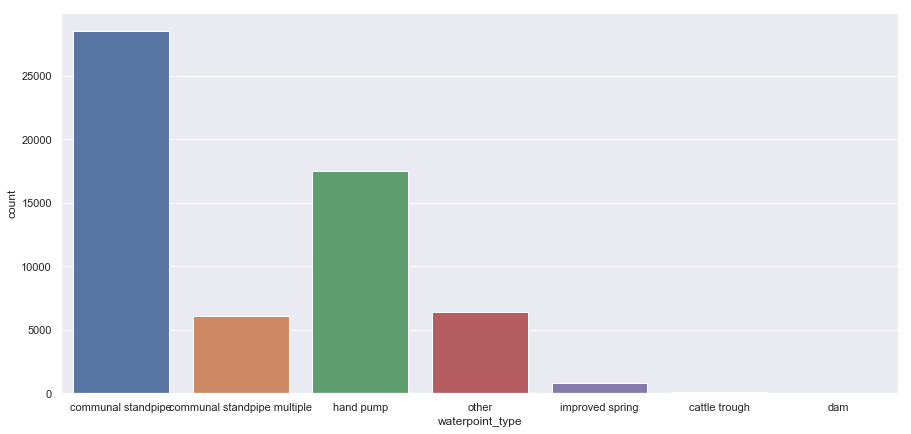

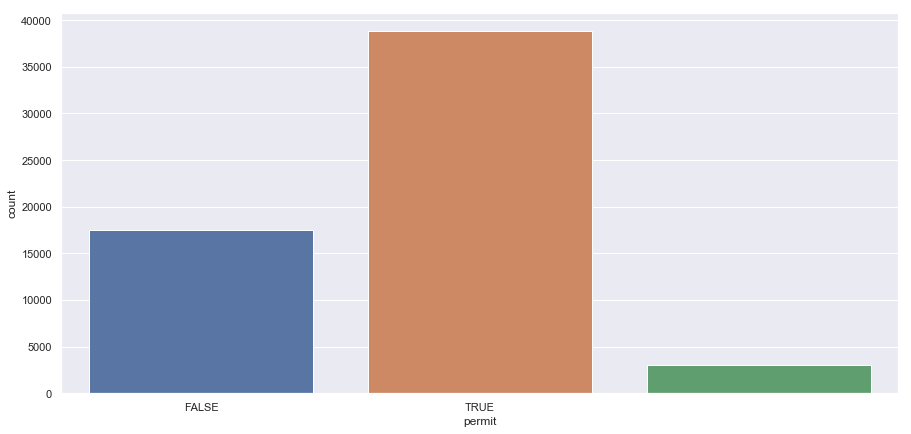

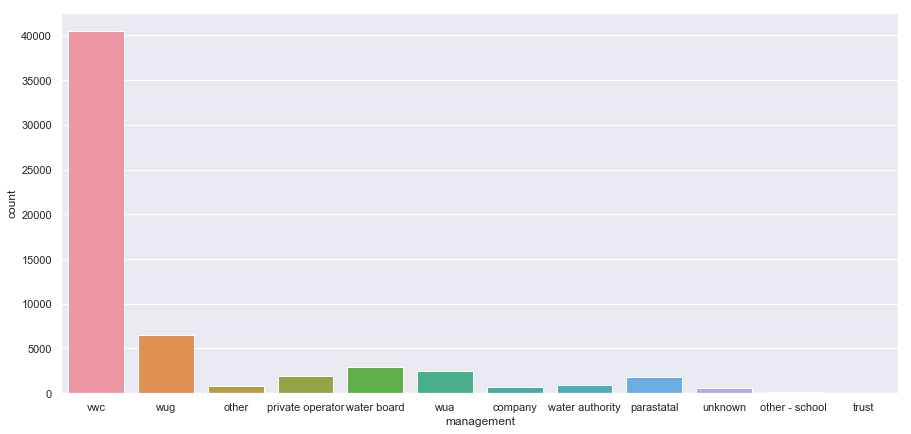

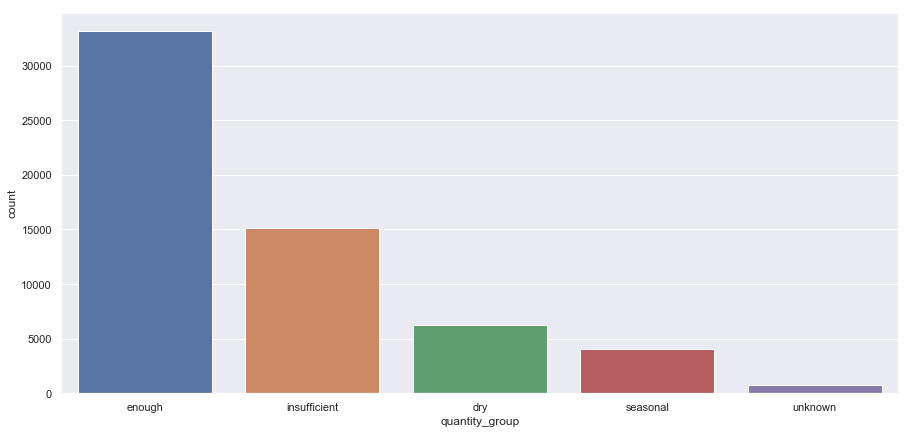

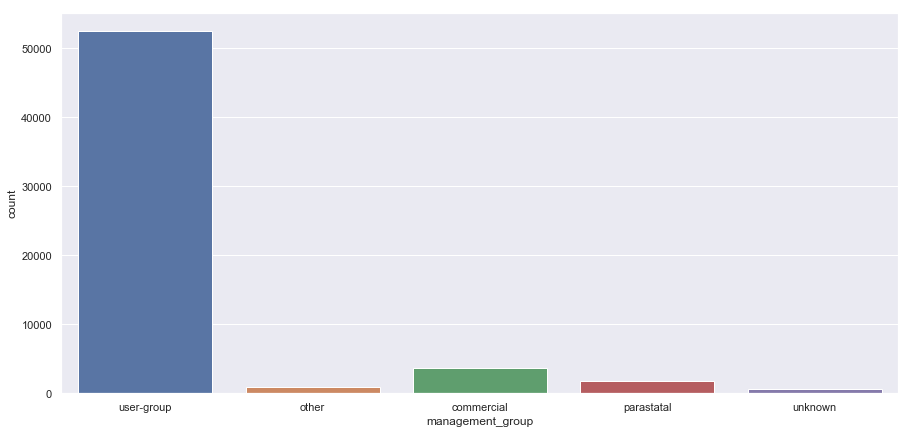

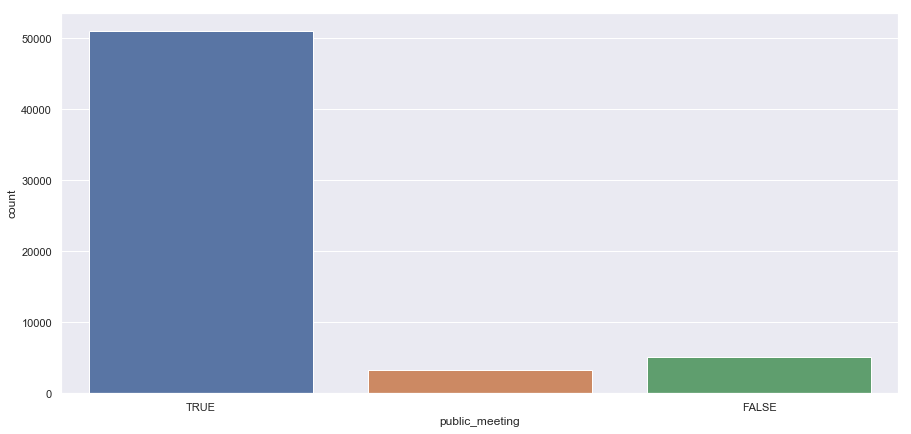

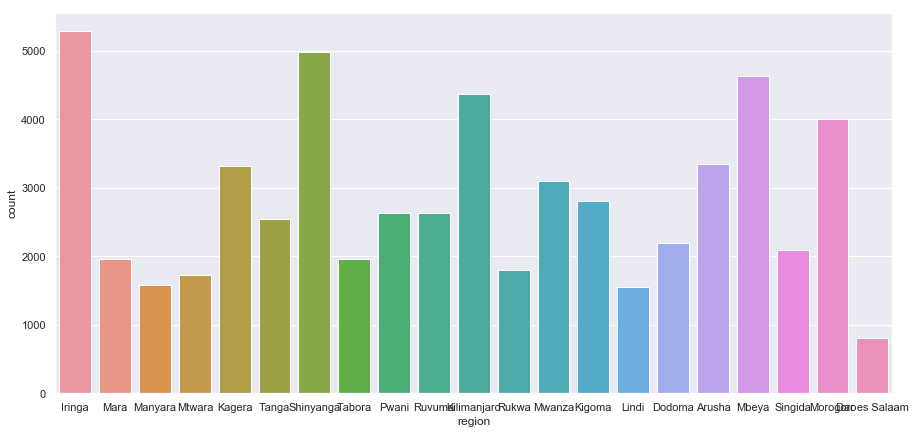

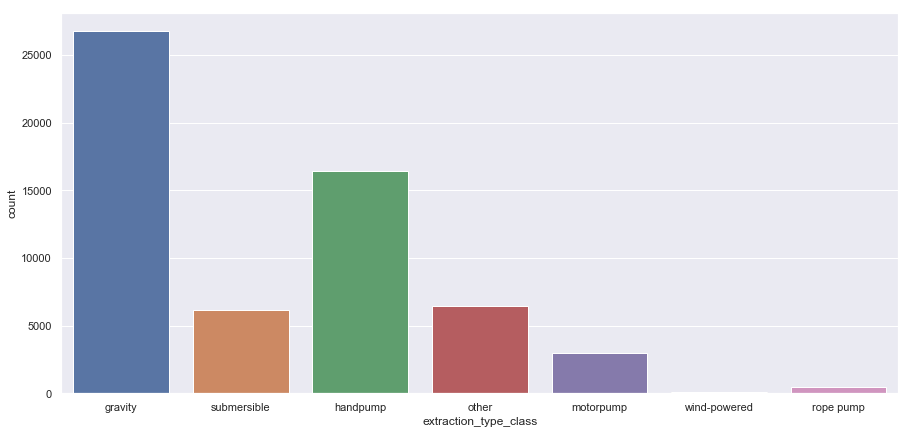

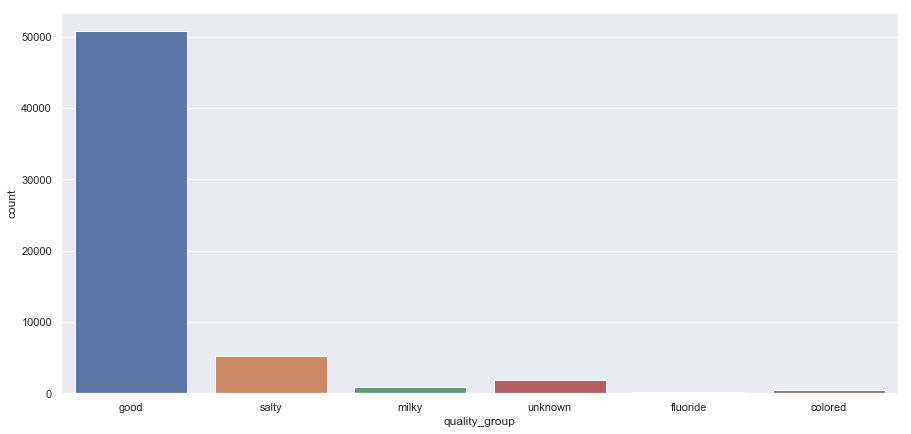

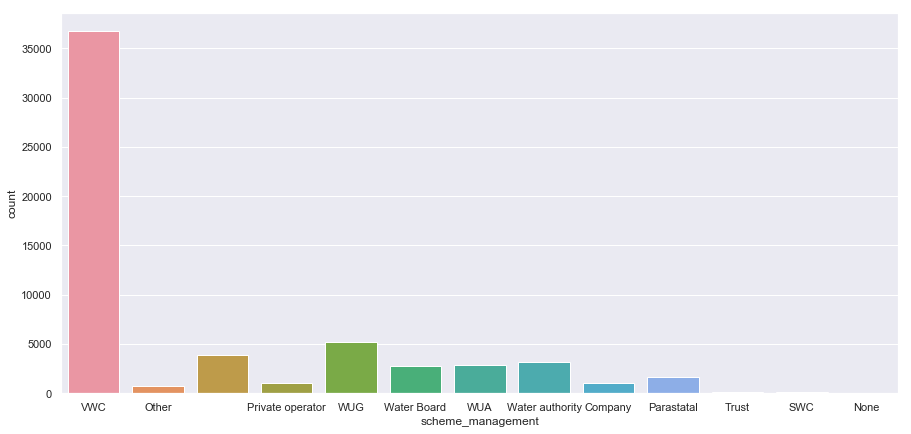

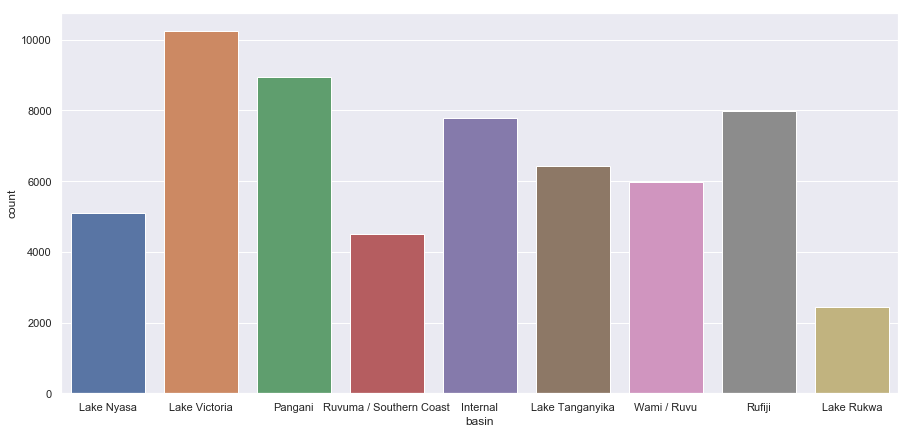

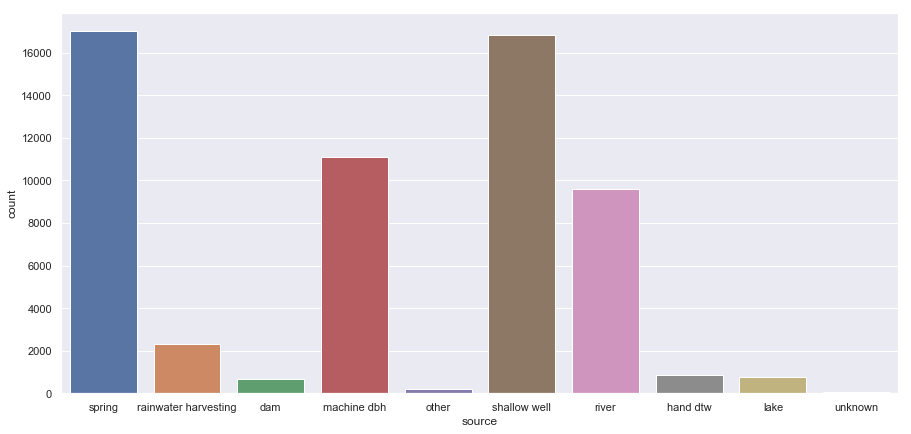

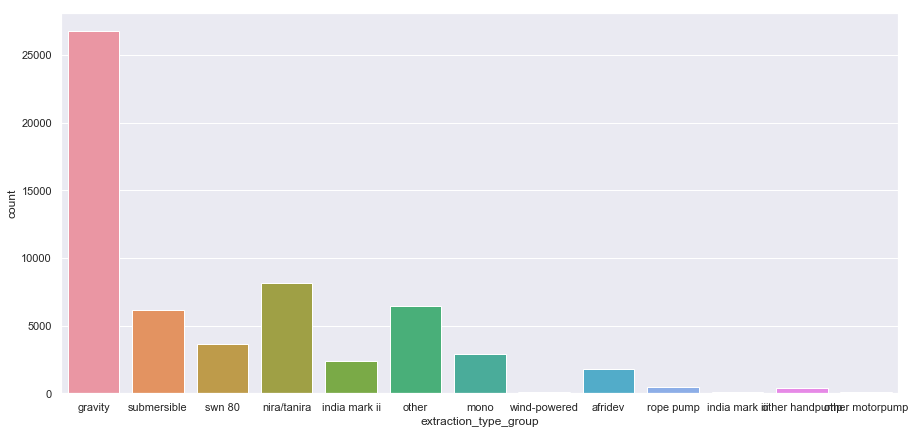

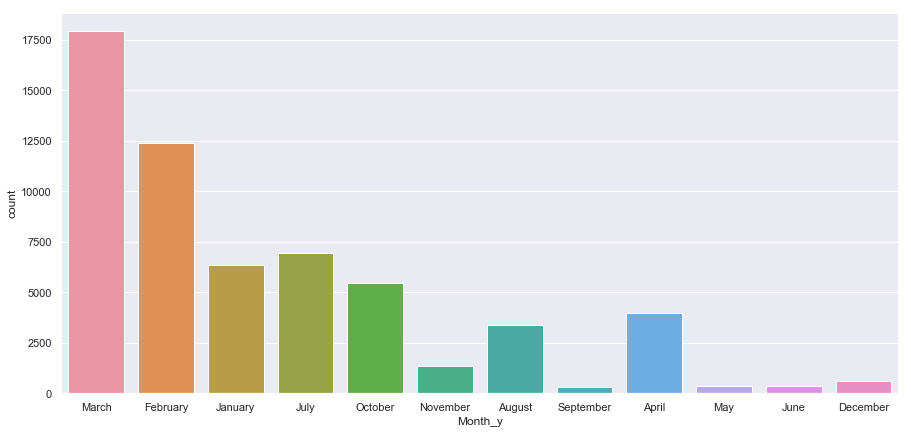

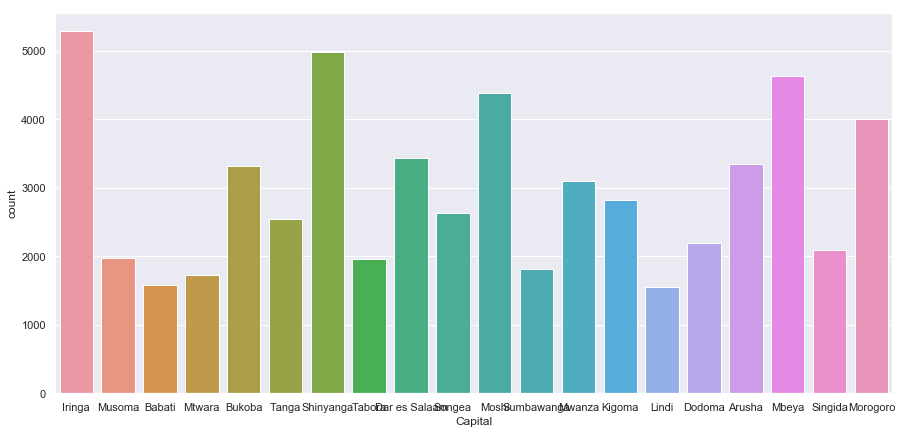

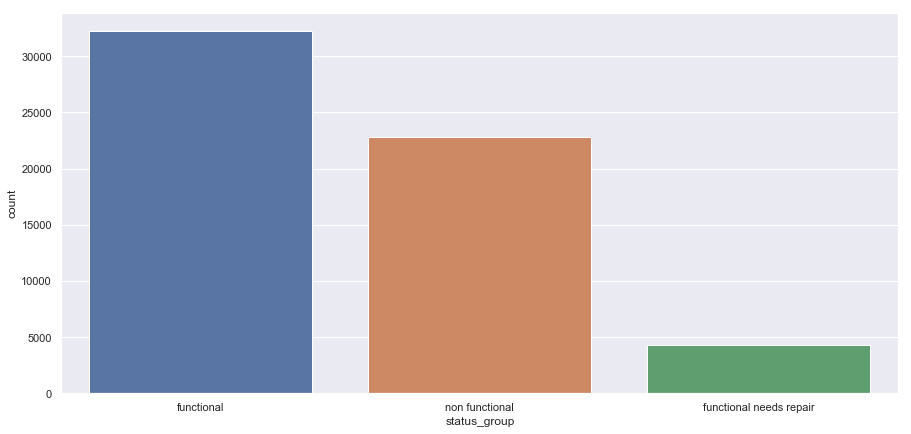

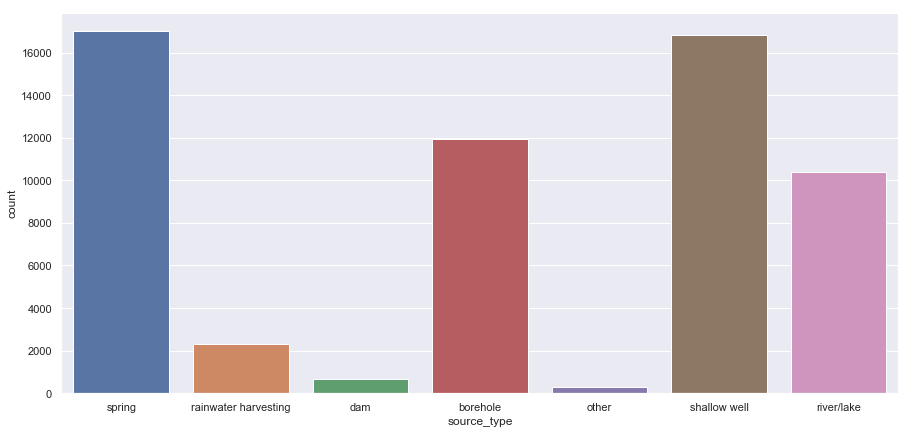

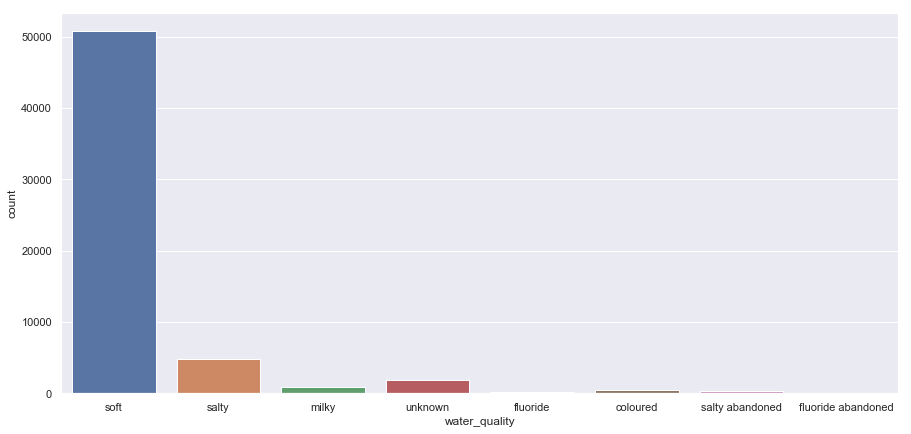

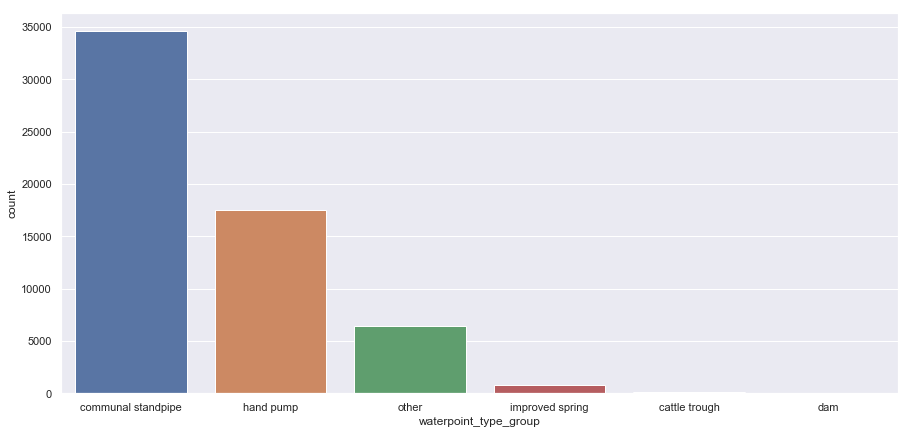

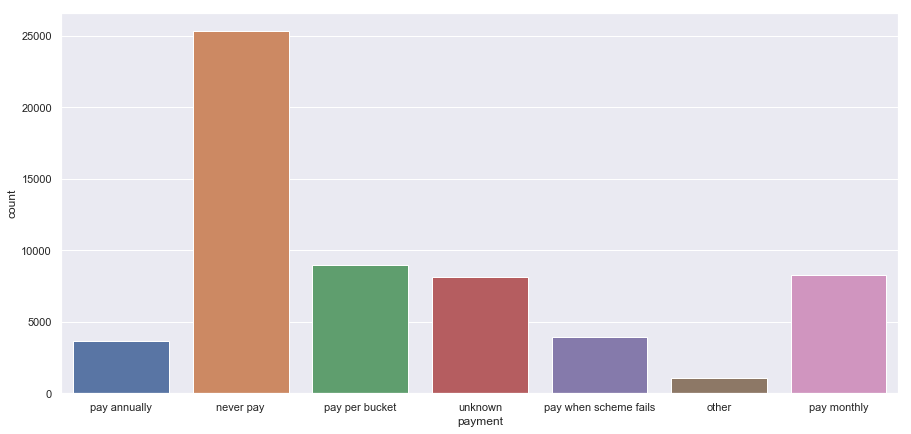

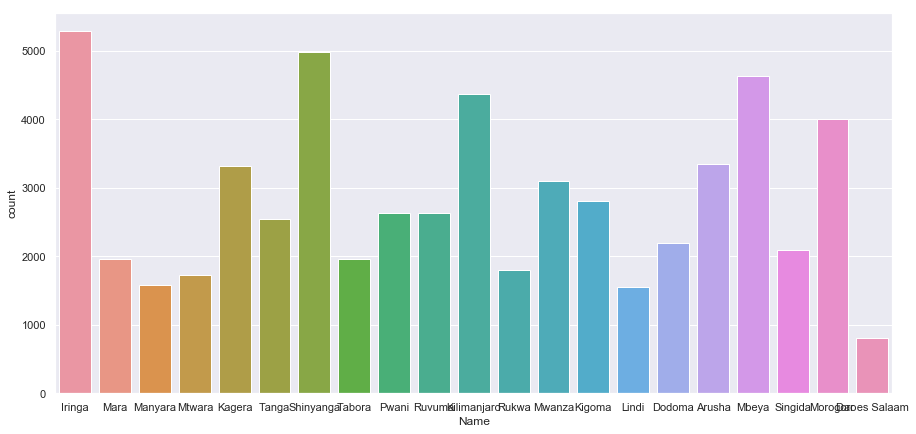

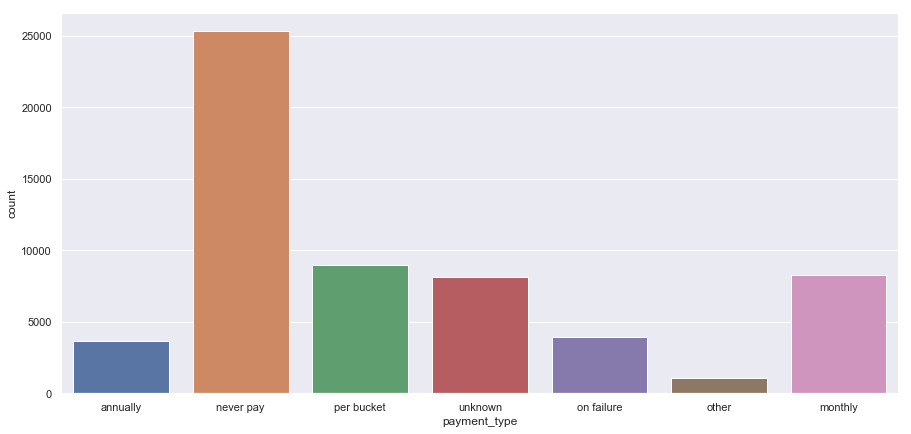

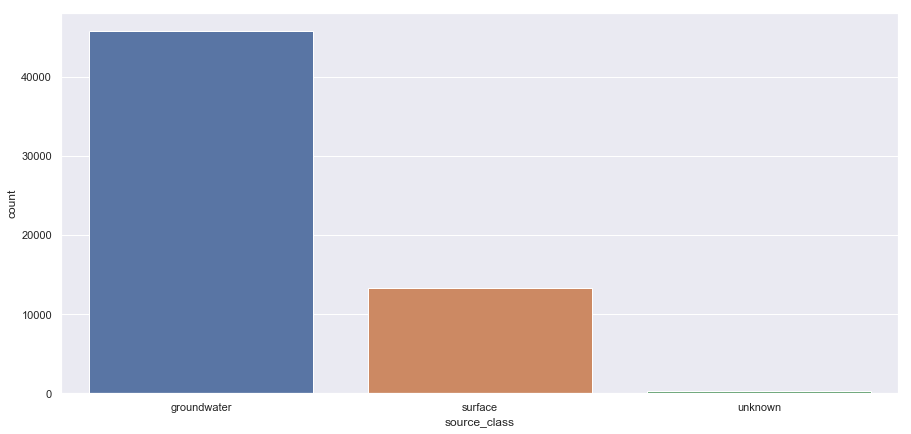

In [ ]:
#Print distributions of categorical variables
for col in range(0, len(reduced_cat)):
    hf.categorical_plot(combined_df, reduced_cat, col) 

In [ ]:
total_cat = reduced_cat.copy()
for var in large_drop:
    combined_df = hf.set_empty(combined_df, var)
    total_cat.append(combined_df.columns[len(combined_df.columns)-1])

In [ ]:
#Scale the status variable
categorical_df = hf.categorical_to_scale(combined_df, 'status_group')
categorical_df.head()

,id,status_group,Year,Month_x,Day,Day_of_week,amount_tsh,funder,gps_height,installer,...,rainy_days,total_rain_mm,installer_empty,subvillage_empty,lga_empty,scheme_name_empty,funder_empty,wpt_name_empty,ward_empty,func_band
0,69572,functional,2011,3,14,1,6000.0,Roman,1390,Roman,...,7,113.9,1,1,1,1,1,0,1,2
1,8776,functional,2013,3,6,3,0.0,Grumeti,1399,GRUMETI,...,7,113.9,1,1,1,1,1,1,1,2
2,34310,functional,2013,2,25,1,25.0,Lottery Club,686,World vision,...,9,144.5,1,1,1,1,1,1,1,2
3,67743,non functional,2013,1,28,1,0.0,Unicef,263,UNICEF,...,10,133.7,1,1,1,1,1,1,1,0
4,19728,functional,2011,7,13,3,0.0,Action In A,0,Artisan,...,0,0.0,1,1,1,1,1,1,1,2


<Figure size 1080x504 with 0 Axes>

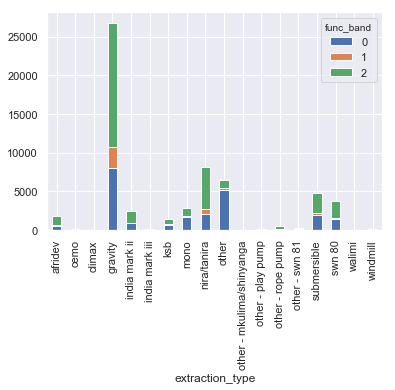

<Figure size 1080x504 with 0 Axes>

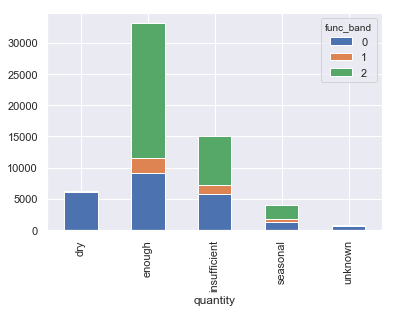

<Figure size 1080x504 with 0 Axes>

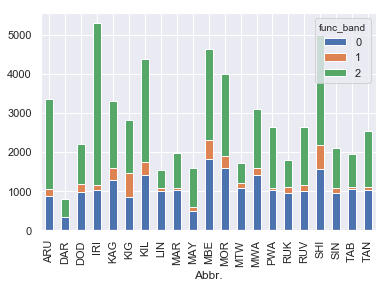

<Figure size 1080x504 with 0 Axes>

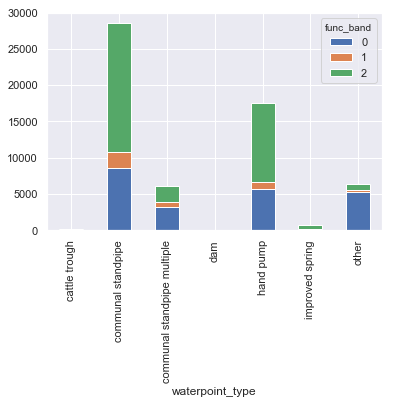

<Figure size 1080x504 with 0 Axes>

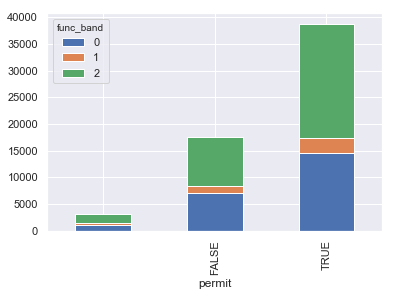

<Figure size 1080x504 with 0 Axes>

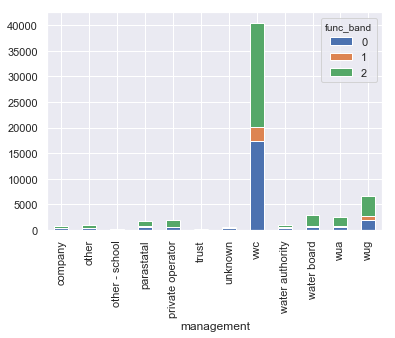

<Figure size 1080x504 with 0 Axes>

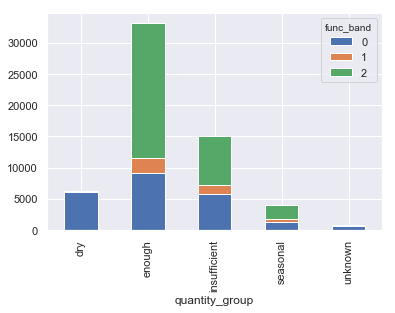

<Figure size 1080x504 with 0 Axes>

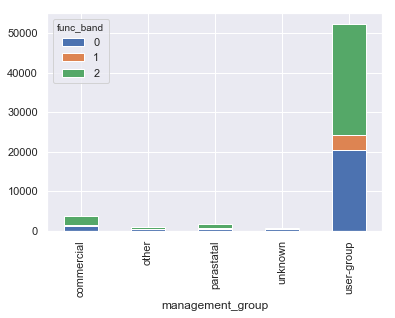

<Figure size 1080x504 with 0 Axes>

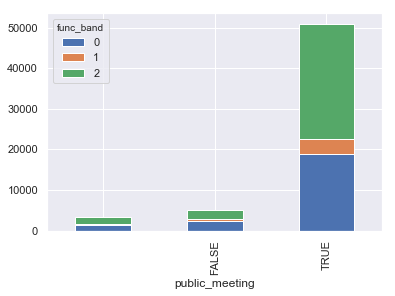

<Figure size 1080x504 with 0 Axes>

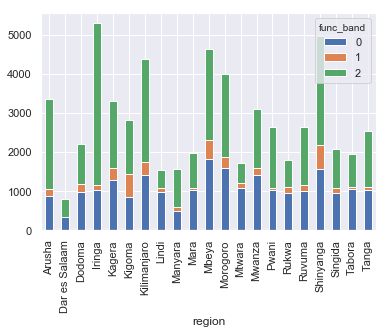

<Figure size 1080x504 with 0 Axes>

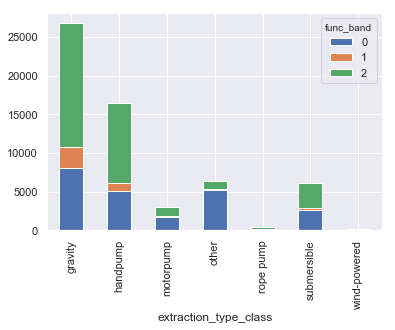

<Figure size 1080x504 with 0 Axes>

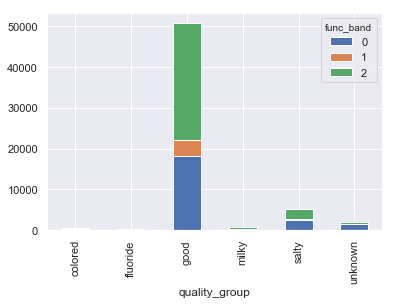

<Figure size 1080x504 with 0 Axes>

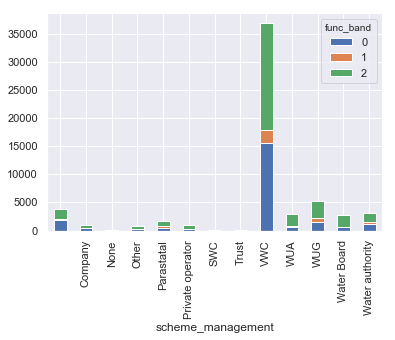

<Figure size 1080x504 with 0 Axes>

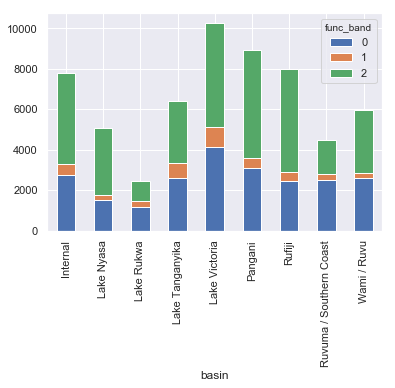

<Figure size 1080x504 with 0 Axes>

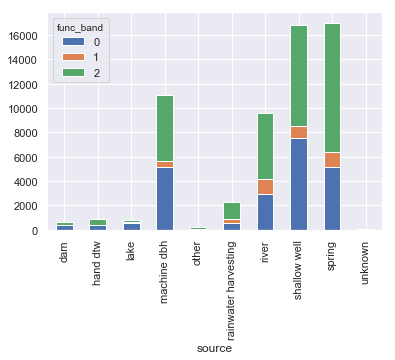

<Figure size 1080x504 with 0 Axes>

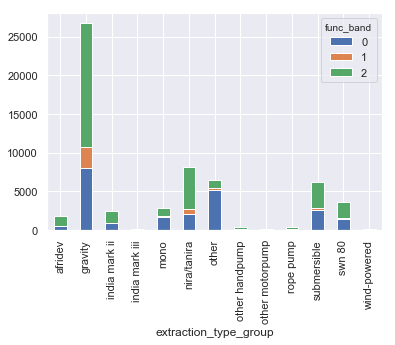

<Figure size 1080x504 with 0 Axes>

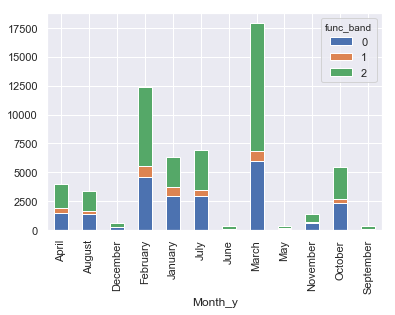

<Figure size 1080x504 with 0 Axes>

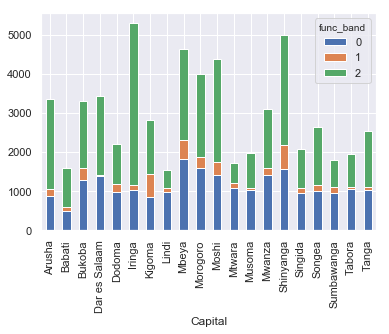

<Figure size 1080x504 with 0 Axes>

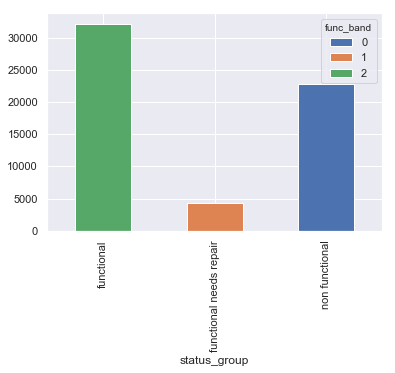

<Figure size 1080x504 with 0 Axes>

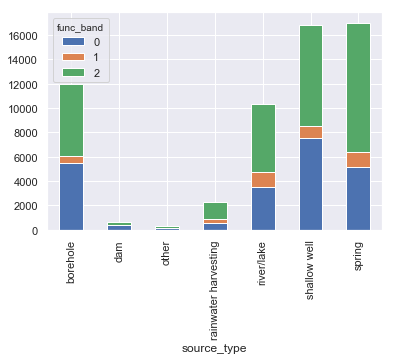

<Figure size 1080x504 with 0 Axes>

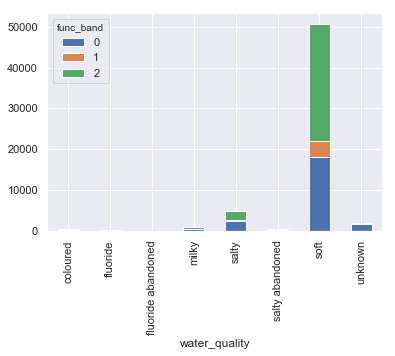

<Figure size 1080x504 with 0 Axes>

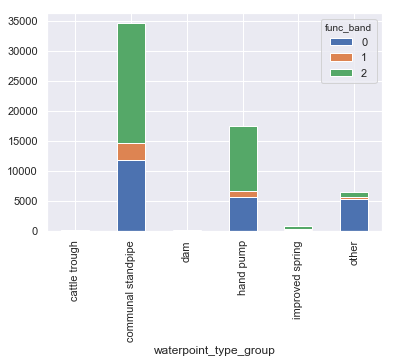

<Figure size 1080x504 with 0 Axes>

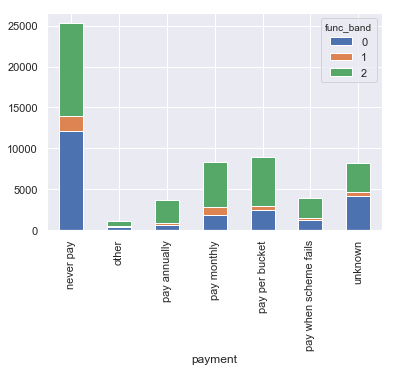

<Figure size 1080x504 with 0 Axes>

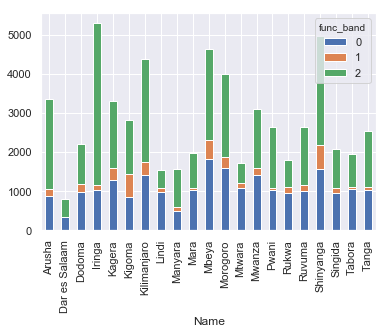

<Figure size 1080x504 with 0 Axes>

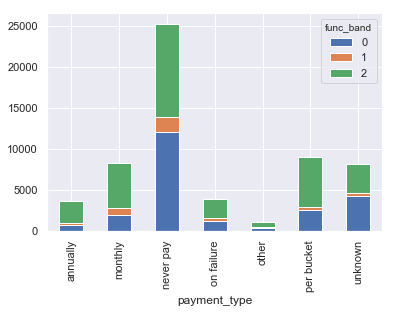

<Figure size 1080x504 with 0 Axes>

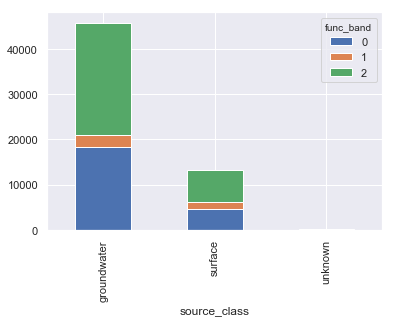

<Figure size 1080x504 with 0 Axes>

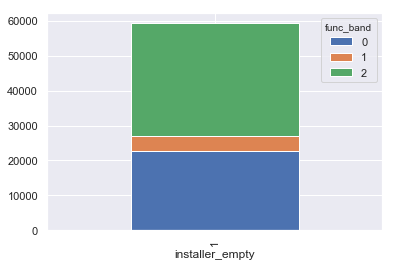

<Figure size 1080x504 with 0 Axes>

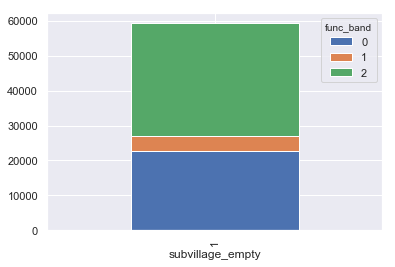

<Figure size 1080x504 with 0 Axes>

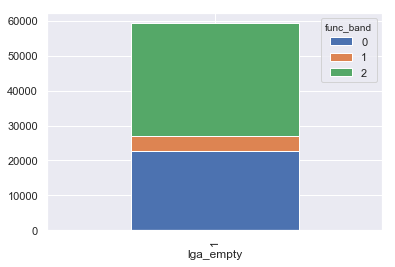

<Figure size 1080x504 with 0 Axes>

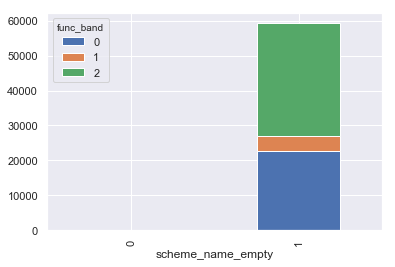

<Figure size 1080x504 with 0 Axes>

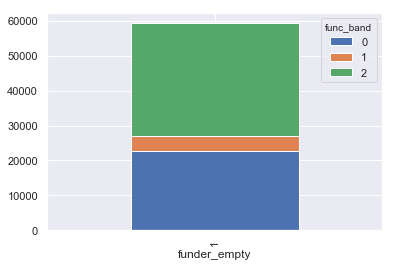

In [ ]:
target = 'func_band'
for var in total_cat:
    hf.cat_stacked_bar(categorical_df, target ,var)

In [ ]:
#Create dummy variables for categorical variables
encoded_df = hf.onehot_encode(categorical_df, reduced_cat)
encoded_df = encoded_df.drop(large_drop, axis = 1)
encoded_df = encoded_df.drop(small_drop, axis = 1)

#Keep track of boolean variables after encoding
booleans = hf.boolean_features(encoded_df)
encoded_df.head()

In [ ]:
# Extract the data we're interested in
lat = encoded_df['latitude'].values
lon = encoded_df['longitude'].values
amount = encoded_df['amount_tsh'].values
population = encoded_df['population'].values
scale_target= encoded_df[target].values

lat_med = stat.median(encoded_df['latitude'].values)
lon_med = stat.median(encoded_df['longitude'].values)

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=lat_med, lon_0=lon_med,
            width=1.3E6, height=1.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting amount of water available
m.scatter(lon, lat, latlon=True, c=population, cmap = 'Reds', 
          s=np.sqrt(amount), alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\rm population}$')
plt.clim(0, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.4, s=a,
                label=str(a) + ' water available')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=lat_med, lon_0=lon_med,
            width=1.3E6, height=1.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting well status
m.scatter(lon, lat, latlon=True, c=scale_target, cmap = 'Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\rm Well Functioning Status}$')
plt.clim(0, 2)

In [ ]:
prepared = encoded_df.copy()
prepared[scaled_numerics] = hf.fix_skewness(encoded_df[scaled_numerics])
prepared = hf.standardize(prepared, scaled_numerics)
prepared.head()

In [ ]:
plt.figure(figsize=(10,8)) 
sns.heatmap(prepared.corr(), cmap="RdYlGn")
plt.show()

In [ ]:
# Split into train and test sets
size = 0.20
seed = 12345
target_metric = 'accuracy'

features = list(prepared)
features.remove(target)

dependent_var = [target]
X = prepared.loc[:, features]
y = prepared.loc[:, dependent_var]

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=seed)

In [ ]:
# fit baseline model
lg1 = GradientBoostingClassifier(n_estimators = 200)
#lg1 = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
lg1 = lg1.fit(X_train,y_train)

y_pred = lg1.predict(X_test) 
hf.confusion_heat_map(y_test, y_pred)

In [ ]:
print('BASE LINE:')
print('Accuracy of Logistic Regression classifier on hold-out set: {:.2f}'.format(lg1.score(X_test, y_test)))
accuracy = cross_val_score(lg1, X, y.values.ravel(), scoring='accuracy', cv=10) 
print('Mean Accuracy after CV: {:.3f} +/- {:.03f}'.format(np.mean(accuracy), np.std(accuracy)))
print('Best Accuracy after CV: {:.3f}'.format(max(accuracy)))
print()
print(classification_report(y_test, y_pred))

## Principal Component Analysis

In [ ]:
#Create PCA object for 20 components
pca = PCA(n_components = 20, random_state = seed)
pca.fit(X_train)

#Apply PCA to X train set and join with Y train set
X_pca = pd.DataFrame(pca.fit_transform(X_train[scaled_numerics]))
PCA_train = X_pca.join(y_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
#Analyze different PCA combinations
PCA_num = 10
for x in range(0,PCA_num):
    for y in range(1,PCA_num):
        if x != y:
            hf.pca_analysis(PCA_train, target, pca_1 = x, pca_2 = y, labels=[0,1,2], 
            labl={0:'Non-Functional',1:'Repair',2:'Functional'})


## Test Data Processing and Modeling

In [ ]:
raw_test_df = test_df.drop('date_recorded', axis = 1)
clean_test_df = hf.read_data(file_path_5)
cols = ['id', 'Year', 'Month', 'Day', 'Day_of_week']
dates = clean_test_df[cols]
dates_test_df = pd.merge(dates, raw_test_df, how = 'inner', on ='id') 
dates_test_df.head()

In [ ]:
combined_test_df = pd.merge(dates_test_df, pop_df, how = 'left', left_on = 'region', 
                            right_on = 'Name')
combined_test_df.head()

In [ ]:
combined_test_df = pd.merge(combined_test_df, weather_df, how = 'left', left_on = 'Month', 
                       right_on = 'Month_num')
combined_test_df.head()

In [ ]:
cat.remove('status_group')
reduced_cat, large_drop, small_drop = hf.drop_categorical(combined_test_df, cat, upper_bound = 30, 
                                                          lower_bound = 2)

In [ ]:
test_total_cat = reduced_cat.copy()
for var in large_drop:
    combined_df = hf.set_empty(combined_test_df, var)
    test_total_cat.append(combined_test_df.columns[len(combined_test_df.columns)-1])

In [ ]:
#Create dummy variables for categorical variables
encoded_test_df = hf.onehot_encode(combined_test_df, reduced_cat)
encoded_test_df = encoded_test_df.drop(large_drop, axis = 1)
encoded_test_df = encoded_test_df.drop(small_drop, axis = 1)

encoded_test_df.head()

In [ ]:
#Final prepared test data
prepared_test = encoded_test_df.copy()
encoded_test_df[scaled_numerics] = hf.fix_skewness(encoded_test_df[scaled_numerics])
prepared_test = hf.standardize(prepared_test, scaled_numerics)
prepared_test.head()

In [ ]:
train_col = X.columns
test_col = prepared_test.columns

X_final_test = prepared_test.copy()
for x in range(0,len(test_col)):
    if train_col[x] != test_col[x] and train_col[x] not in test_col:
        X_final_test[train_col[x]] = 0 * len(X_final_test.index)

In [ ]:
######################## Uncomment to debug ########################
# train_col = X.columns.sort_values()
# final_col = X_final_test.columns.sort_values()
# for x in range(0,len(final_col)):
#     print(train_col[x], final_col[x], train_col[x] == final_col[x])
    
#     if train_col[x] != final_col[x]:
#         print(train_col[x], final_col[x])


In [ ]:
y_test_pred = pd.DataFrame(lg1.predict(X_final_test))

raw_output = X_final_test.join(y_test_pred)
raw_output = raw_output.loc[:,['id', target]]
clean_output = hf.undo_var_scaling(raw_output, target,new_col_name = 'status_group',  
                                cat = ['non functional', 'functional needs repair', 'functional'],
                                drop = True)

clean_output.to_csv("O-1-6_Submission.csv", index=False)
clean_output.head()

In [ ]:
# # Hide code in final report output
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')